<a href="https://colab.research.google.com/github/schmuecker/machine-learning-course/blob/main/01%20explorative-analysis-pca/01.2%20data%20preprocessing/%C3%9Cbung_1.2_Datenvorverarbeitung.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2. Datenvorverarbeitung mit Pandas: Food Nutrient Database

## Einbinden von packages
Import zweier Standardpakete für die Datenanalyse: Numpy für mehrdimensionale Arrays, Pandas für Datenanalyse in Tabellen.

In [ ]:
import json
import zipfile
import urllib.request
import pandas as pd
import numpy as np

json.__version__, np.__version__, pd.__version__

('2.0.9', '1.19.5', '1.1.5')

## a) Einlesen der Data

Idealerweise sind die Noteboks standalone. Im ersten Schritt werden die Daten eingelesen.

#### Direkter Download
Direkter Download der Food Nutrient Database, Abruf des Downloaddatums, automatischer Import in Pandas-Dataframe. 

In [ ]:
fileUrl = 'https://github.com/schmuecker/machine-learning-course/blob/main/01%20explorative-analysis-pca/01.2%20data%20preprocessing/data/foods-2011-10-03.json.zip?raw=true'
fileName = 'foods-2011-10-03.json.zip'
urllib.request.urlretrieve(fileUrl, fileName)


('foods-2011-10-03.json.zip', <http.client.HTTPMessage at 0x7fc9a1392190>)

In [ ]:
with zipfile.ZipFile(fileName) as file:
    with file.open('foods-2011-10-03.json') as jsonFile:
        data = json.load(jsonFile)
        # Print the type of data variable
        print("Type:", type(data))
        print(data[0])
        print(data[0].keys())


Type: <class 'list'>
{'id': 1008, 'description': 'Cheese, caraway', 'tags': [], 'manufacturer': '', 'group': 'Dairy and Egg Products', 'portions': [{'amount': 1, 'unit': 'oz', 'grams': 28.35}], 'nutrients': [{'value': 25.18, 'units': 'g', 'description': 'Protein', 'group': 'Composition'}, {'value': 29.2, 'units': 'g', 'description': 'Total lipid (fat)', 'group': 'Composition'}, {'value': 3.06, 'units': 'g', 'description': 'Carbohydrate, by difference', 'group': 'Composition'}, {'value': 3.28, 'units': 'g', 'description': 'Ash', 'group': 'Other'}, {'value': 376.0, 'units': 'kcal', 'description': 'Energy', 'group': 'Energy'}, {'value': 39.28, 'units': 'g', 'description': 'Water', 'group': 'Composition'}, {'value': 1573.0, 'units': 'kJ', 'description': 'Energy', 'group': 'Energy'}, {'value': 0.0, 'units': 'g', 'description': 'Fiber, total dietary', 'group': 'Composition'}, {'value': 673.0, 'units': 'mg', 'description': 'Calcium, Ca', 'group': 'Elements'}, {'value': 0.64, 'units': 'mg', 'd

## b)

### Beispiel Datensatz

In [ ]:
sampleFood = data[0]
print(sampleFood)

{'id': 1008, 'description': 'Cheese, caraway', 'tags': [], 'manufacturer': '', 'group': 'Dairy and Egg Products', 'portions': [{'amount': 1, 'unit': 'oz', 'grams': 28.35}], 'nutrients': [{'value': 25.18, 'units': 'g', 'description': 'Protein', 'group': 'Composition'}, {'value': 29.2, 'units': 'g', 'description': 'Total lipid (fat)', 'group': 'Composition'}, {'value': 3.06, 'units': 'g', 'description': 'Carbohydrate, by difference', 'group': 'Composition'}, {'value': 3.28, 'units': 'g', 'description': 'Ash', 'group': 'Other'}, {'value': 376.0, 'units': 'kcal', 'description': 'Energy', 'group': 'Energy'}, {'value': 39.28, 'units': 'g', 'description': 'Water', 'group': 'Composition'}, {'value': 1573.0, 'units': 'kJ', 'description': 'Energy', 'group': 'Energy'}, {'value': 0.0, 'units': 'g', 'description': 'Fiber, total dietary', 'group': 'Composition'}, {'value': 673.0, 'units': 'mg', 'description': 'Calcium, Ca', 'group': 'Elements'}, {'value': 0.64, 'units': 'mg', 'description': 'Iron, F

### Beispiel Nährstoff

In [ ]:
nutrient = sampleFood['nutrients'][0]
print(nutrient.keys())


dict_keys(['value', 'units', 'description', 'group'])


### Erstellen des Nahrungsmittel-DataFrames

In [ ]:

def transformFood(food):
    return { 'description': food['description'], 'group': food['group'], 'id': food['id'], 'manufacturer': food['manufacturer'] }
  
result = map(transformFood, data)
info = pd.DataFrame(list(result))

print("Info type:", type(info))
print(len(info), 'entries')
info.head()

Info type: <class 'pandas.core.frame.DataFrame'>
6636 entries


,description,group,id,manufacturer
0,"Cheese, caraway",Dairy and Egg Products,1008,
1,"Cheese, cheddar",Dairy and Egg Products,1009,
2,"Cheese, edam",Dairy and Egg Products,1018,
3,"Cheese, feta",Dairy and Egg Products,1019,
4,"Cheese, mozzarella, part skim milk",Dairy and Egg Products,1028,


### Erstellen des Nährstoff-DataFrames

In [ ]:
def getNutrients(food):
  #n = { 'id': food['id'], 'nutrients': food['nutrients'] }
  df = pd.DataFrame(food['nutrients'])
  #wenn Dict an Dataframe Constructor, dann werden Keys zu Column-Names
  df["id"]=food['id']
  return df
  
result = map(getNutrients, data)
nutrients = list(result)

print("Nutrients type:", type(nutrients))
print(len(nutrients), 'entries')

Nutrients type: <class 'list'>
6636 entries


In [ ]:
nutrientsDF = pd.concat(nutrients)
nutrientsDF

,value,units,description,group,id
0,25.180,g,Protein,Composition,1008
1,29.200,g,Total lipid (fat),Composition,1008
2,3.060,g,"Carbohydrate, by difference",Composition,1008
3,3.280,g,Ash,Other,1008
4,376.000,kcal,Energy,Energy,1008
...,...,...,...,...,...
45,0.000,mcg,"Vitamin B-12, added",Vitamins,43546
46,0.000,mg,Cholesterol,Other,43546
47,0.072,g,"Fatty acids, total saturated",Other,43546
48,0.028,g,"Fatty acids, total monounsaturated",Other,43546


### Duplikate entfernen

In [ ]:
nutrientsDF.drop_duplicates(inplace=True)
print(len(nutrientsDF))
print(nutrientsDF.head())

375176
    value units                  description        group    id
0   25.18     g                      Protein  Composition  1008
1   29.20     g            Total lipid (fat)  Composition  1008
2    3.06     g  Carbohydrate, by difference  Composition  1008
3    3.28     g                          Ash        Other  1008
4  376.00  kcal                       Energy       Energy  1008


In [ ]:
nutrientsDF.rename(inplace=True, axis=1, mapper={"description":"nu_desc", "group":"nu_group"})
print(nutrientsDF.head())

    value units                      nu_desc     nu_group    id
0   25.18     g                      Protein  Composition  1008
1   29.20     g            Total lipid (fat)  Composition  1008
2    3.06     g  Carbohydrate, by difference  Composition  1008
3    3.28     g                          Ash        Other  1008
4  376.00  kcal                       Energy       Energy  1008


In [ ]:
df = pd.merge(nutrientsDF, info, on="id", how="outer")
#merge ähnlich wie Join in SQL

In [ ]:
df.head()

,value,units,nu_desc,nu_group,id,description,group,manufacturer
0,25.18,g,Protein,Composition,1008,"Cheese, caraway",Dairy and Egg Products,
1,29.20,g,Total lipid (fat),Composition,1008,"Cheese, caraway",Dairy and Egg Products,
2,3.06,g,"Carbohydrate, by difference",Composition,1008,"Cheese, caraway",Dairy and Egg Products,
3,3.28,g,Ash,Other,1008,"Cheese, caraway",Dairy and Egg Products,
4,376.00,kcal,Energy,Energy,1008,"Cheese, caraway",Dairy and Egg Products,


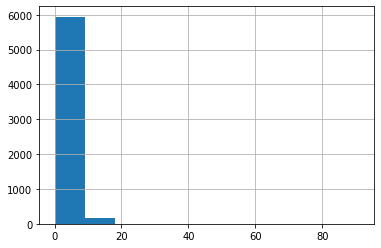

In [ ]:
zinc = df[df['nu_desc']=="Zinc, Zn"]
zinc_values = zinc["value"]
zinc_values.hist()

In [ ]:
zinc_values.describe()

count    6137.000000
mean        2.228589
std         3.975321
min         0.000000
25%         0.340000
50%         0.980000
75%         2.980000
max        90.950000
Name: value, dtype: float64

In [ ]:
#Edamer hat überdurchschnittlichen Zinkgehalt
edamer_zinc = zinc[zinc["description"]=="Cheese, edam"]["value"].values[0]
# .values gibt eine Python List anstatt einer Pandas Series
edamer_zinc > zinc_values.mean()

True

In [ ]:
#Über 70 % haben kleineren Zinkgehalt
sum(zinc_values<edamer_zinc) / len(zinc_values)

0.8062571288903373

In [ ]:
#Höchster Zinkgehalt
zinc.loc[zinc["value"].idxmax()]

value                                       90.95
units                                          mg
nu_desc                                  Zinc, Zn
nu_group                                 Elements
id                                          15170
description     Mollusks, oyster, eastern, canned
group              Finfish and Shellfish Products
manufacturer                                     
Name: 333726, dtype: object